## ArrayDataFrame

In [2]:
import numpy as np

In [3]:
ageList = [9, 9, 10, 8, 12, 10, 7, 8, 10, 8, 0, 9, 7, 9, 10, 9, 6, 9, 9, 11]
ages = np.array(ageList)
ages.std()

2.3769728648009427

In [4]:
print(ages)

[ 9  9 10  8 12 10  7  8 10  8  0  9  7  9 10  9  6  9  9 11]


(array([1., 0., 0., 0., 0., 3., 3., 7., 4., 2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

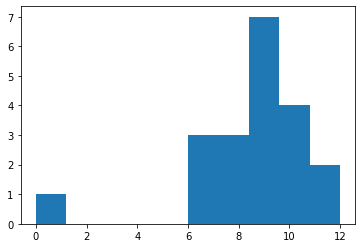

In [5]:
import matplotlib.pyplot
matplotlib.pyplot.hist(ages)


In [7]:
import pandas as pd
Students = pd.DataFrame()
Students

""


In [8]:
Students['ages'] = ages
Students['Grade'] = [4, 3, 4, 3, 6, 5, 2, 3, 5, 3, 1, 4, 2, 5, 6, 4, 1, 4, 2, 6]
Students

,ages,Grade
0,9,4
1,9,3
2,10,4
3,8,3
4,12,6
5,10,5
6,7,2
7,8,3
8,10,5
9,8,3


In [9]:
# Determine the correlation coefficient between the two columns
Students.corr()

,ages,Grade
ages,1.000000,0.792809
Grade,0.792809,1.000000


## Linear regression

In [10]:
# Anscombe's Quartet Data
x0 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y0 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x3 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y3 = [6.58, 5.76, 7.71, 8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89]

In [11]:
lx = np.array([0., 20.])
ly = np.array([3., 13.])

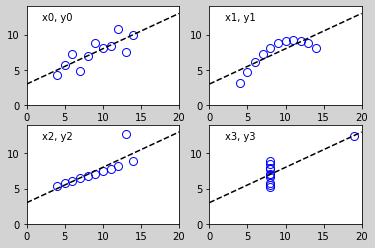

In [14]:
import matplotlib.pyplot as plt
plt.figure(1, facecolor='lightgrey')

plt.subplot(221)
plt.plot(x0, y0, 'bo', ms=8, mfc='none')
plt.xlim(0,20)
plt.ylim(0,14)
plt.text(x=2,y=12,s="x0, y0")
plt.plot([0., 20.], [3., 13.], '--k')

plt.subplot(222)
plt.plot(x1, y1, 'bo', ms=8, mfc='none')
plt.xlim(0,20)
plt.ylim(0,14)
plt.text(x=2,y=12,s="x1, y1")
plt.plot([0., 20.], [3., 13.], '--k')

plt.subplot(223)
plt.plot(x2, y2, 'bo', ms=8, mfc='none')
plt.xlim(0,20)
plt.ylim(0,14)
plt.text(x=2,y=12,s="x2, y2")
plt.plot([0., 20.], [3., 13.], '--k')

plt.subplot(224)
plt.plot(x3, y3, 'bo', ms=8, mfc='none')
plt.xlim(0,20)
plt.ylim(0,14)
plt.text(x=2,y=12,s="x3, y3")
plt.plot([0., 20.], [3., 13.], '--k')

plt.show()

In [15]:
def DataStats(x, y):
    RowOfStats = np.empty((7,))
    RowOfStats[0] = np.mean(x)
    RowOfStats[1] = np.mean(y)
    RowOfStats[2] = np.var(x, ddof=1)
    RowOfStats[3] = np.var(y, ddof=1)
    RowOfStats[4] = np.corrcoef(x, y)[0,1]
    regr = LinearRegression()
    regr.fit(np.array(x, ndmin=2).T, y)
    RowOfStats[5] = regr.intercept_
    RowOfStats[6] = regr.coef_[0]
    return RowOfStats

In [16]:
TableOfStats = pd.DataFrame(columns = ["Mean(X)", "Mean(Y)", "Var(X)", 
                                       "Var(Y)", "Corr", "Intercept", "Slope"])

In [18]:
from sklearn.linear_model import LinearRegression
TableOfStats.loc[0,:] = DataStats(x0, y0).round(2)
TableOfStats.loc[1,:] = DataStats(x1, y1).round(2)
TableOfStats.loc[2,:] = DataStats(x2, y2).round(2)
TableOfStats.loc[3,:] = DataStats(x3, y3).round(2)

print(TableOfStats)


  Mean(X) Mean(Y) Var(X) Var(Y)  Corr Intercept Slope
0       9     7.5     11   4.13  0.82         3   0.5
1       9     7.5     11   4.13  0.82         3   0.5
2       9     7.5     11   4.12  0.82         3   0.5
3       9     7.5     11   4.12  0.82         3   0.5


In [20]:
# Four different datasets have the following measures
# Mean of x:  9
# Sample variance of x: 11
# Mean of y:	7.50
# Sample variance of y:  4.125
# Correlation between x and y:  0.816
# Linear regression line:  y = 3.00 + 0.500x

### Simpsons Paradox

In [ ]:
# A consistent trend appears in multiple datasets
# The trend reverses when these datasets are combined

In [22]:
# Data set 0
x0 = np.random.normal(loc=10, scale=4, size=100)
y0 = 80 + x0 + np.random.normal(loc=10, scale=4, size=100)
Corr0 = 'r = ' + str(np.corrcoef(x0, y0)[0,1].round(3))
regr = LinearRegression()
regr.fit(np.array(x0, ndmin=2).T, y0)
xline = np.array([0, 50])
yline0 = regr.intercept_ + regr.coef_[0] * xline

# Data set 1
x1 = np.random.normal(loc=20, scale=4, size=100)
y1 = 40 + x1 + np.random.normal(loc=10, scale=4, size=100)
Corr1 = 'r = ' + str(np.corrcoef(x1, y1)[0,1].round(3))
regr = LinearRegression()
regr.fit(np.array(x1, ndmin=2).T, y1)
xline = np.array([0, 50])
yline1 = regr.intercept_ + regr.coef_[0] * xline

# Data set 2
x2 = np.random.normal(loc=30, scale=4, size=100)
y2 = 0 + x2 + np.random.normal(loc=10, scale=4, size=100)
Corr2 = 'r = ' + str(np.corrcoef(x2, y2)[0,1].round(3))
regr = LinearRegression()
regr.fit(np.array(x2, ndmin=2).T, y2)
xline = np.array([0, 50])
yline2 = regr.intercept_ + regr.coef_[0] * xline

# Combined Data set
x = np.concatenate((x0, x1, x2))
y = np.concatenate((y0, y1, y2))
Corr = 'r = ' + str(np.corrcoef(x, y)[0,1].round(3))
regr = LinearRegression()
regr.fit(np.array(x, ndmin=2).T, y)
xline = np.array([0, 50])
yline = regr.intercept_ + regr.coef_[0] * xline

[None, None]

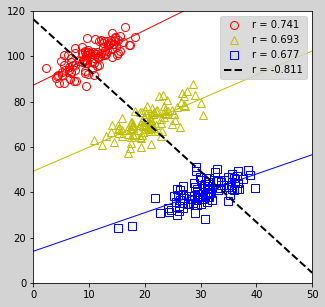

In [23]:
plt.figure(1, figsize=(5,5), facecolor='lightgrey')
plt.xlim(0,50)
plt.ylim(0,120)
plt.plot(x0, y0, 'ro', ms=8, mfc='none')
plt.plot(x1, y1, 'y^', ms=8, mfc='none')
plt.plot(x2, y2, 'bs', ms=8, mfc='none')
line = plt.plot(xline, yline)
plt.setp(line, 'color', 'k', 'linewidth', 2.0, 'ls', '--')
plt.legend([Corr0, Corr1, Corr2, Corr], facecolor='lightgrey')
line0 = plt.plot(xline, yline0)
plt.setp(line0, 'color', 'r', 'linewidth', 1.0)
line1 = plt.plot(xline, yline1)
plt.setp(line1, 'color', 'y', 'linewidth', 1.0)
line2 = plt.plot(xline, yline2)
plt.setp(line2, 'color', 'b', 'linewidth', 1.0)

 ## Spurious self-correlation

In [24]:
# Create two random variables that should have no correlation with each other
x = 10*np.random.random(1000) + 10
y = 10*np.random.random(1000) + 10
Correlation = np.corrcoef(x, y)[0,1].round(3)

Text(0.5, 1.0, 'No correlation between x and y\n (r = -0.02)')

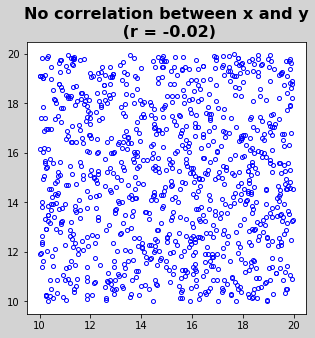

In [25]:
plt.figure(1, figsize=(5,5), facecolor='lightgrey')
plt.plot(x, y, 'bo', ms=4, mfc='none')
font = {'weight': 'bold', 'size': 16,}
Label = "No correlation between x and y\n (r = " + str(Correlation) + ")"
plt.title(Label, fontdict=font)


In [26]:
# Create a third random variable that has no correlation with either of the  first two variables
z = 10*np.random.random(1000) + 10
Correlation = np.corrcoef(x, z)[0,1].round(3)
print("Correlation between x and z:", Correlation)
Correlation = np.corrcoef(y, z)[0,1].round(3)
print("Correlation between y and z:", Correlation)


Correlation between x and z: 0.024
Correlation between y and z: 0.001


In [27]:
# Create ratios of x per z and y per z
xz = x/z
yz = y/z
Correlation = np.corrcoef(xz, yz)[0,1].round(3)
regr = LinearRegression()
regr.fit(np.array(xz, ndmin=2).T, yz)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[None, None, None]

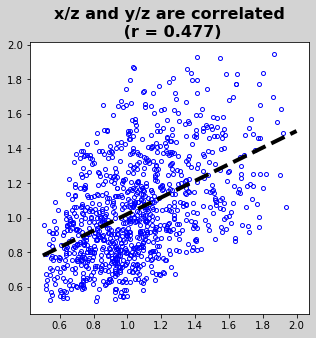

In [28]:
# Plot Correlated ratios
plt.figure(2, figsize=(5,5), facecolor='lightgrey')
plt.plot(xz, yz, 'bo', ms=4, mfc='none')
font = {'weight': 'bold', 'size': 16,}
Label = "x/z and y/z are correlated\n (r = " + str(Correlation) + ")"
plt.title(Label, fontdict=font)
xline = np.array([0.5, 2.0])
yline = regr.intercept_ + regr.coef_[0] * xline
line = plt.plot(xline, yline)
plt.setp(line, 'color', 'k', 'linewidth', 4.0, 'ls', '--')

## StatsAnomaly

In [29]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from scipy.stats import norm

In [30]:
def z_score(x):
    m = np.mean(x)
    s = np.std(x)
    return (np.array(x) - m) / s

In [31]:
# Initialization
rnd.seed(a = 123)
m1, s1, n1 = 0.0, 1.0, 30
m2, s2, n2 = 7.0, 0.5, 20
nb = 30 # number of bins for histogram
n = n1 + n2 # total number of data points in feature
th1 = 0.05 # p-value threshold below which a data point is considered an outlier for 1-D data
th2 = 0.01 # p-value threshold below which a data point is considered an outlier for 2-D data

In [32]:
# Data to work with (X = values of feature X, Z = 2-dimensional feature set)
X = np.hstack([np.random.normal(m1, s1, n1), np.random.normal(m2, s2, n2)])
X[0] = 3.9 # inlier
X[-1] = 10.0 # outlier 1
X[1] = -5.0 # outlier 2
Z = np.transpose(np.vstack([np.random.normal(m1, s1, n), np.random.normal(m2, s2, n)]))
Z[0,0] = 3.5 # outlier 1
Z[0,1] = 5.0 # outlier 1
Z[-1,0] = -3.0 # outlier 2
Z[-1,1] = 9.0 # outlier 2
nf = 2 # number of features in Z

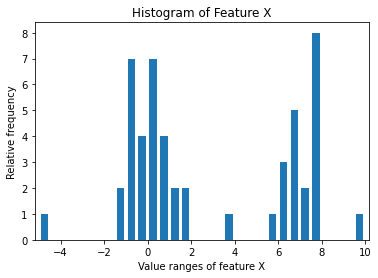

In [33]:

# Explore anomalies in 1-D space
# Take a look at the histogram of this data
plt.figure()
plt.title('Histogram of Feature X')
plt.xlim([np.min(X)-0.2, np.max(X)+0.2])
plt.xlabel('Value ranges of feature X')
plt.ylabel('Relative frequency')
hist, bins = np.histogram(X, bins=nb)
w = 0.7 * (bins[1] - bins[0]) # width of each bin
c = (bins[:-1] + bins[1:]) / 2 # center point of histogram
plt.bar(c, hist, align='center', width=w)
plt.show()

In [34]:
# Identify anomalies in feature x
zx = z_score(X) # z-scores for various points in X
px = norm.sf(abs(zx)) # p-value based on z-score (one-sided approach)
outliers = X[px < th1]
print ('\nOutliers for feature X:', outliers, '\n')


Outliers for feature X: [-5. 10.] 



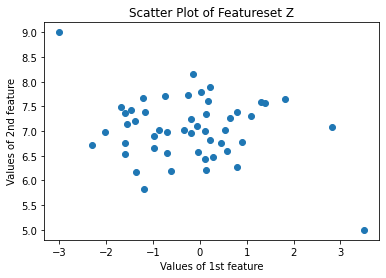

In [35]:
# Explore anomalies in 2-D space
# Take a look at the scatter plot of this data
plt.figure()
plt.title('Scatter Plot of Featureset Z')
plt.xlabel('Values of 1st feature')
plt.ylabel('Values of 2nd feature')
plt.scatter(Z[:,0], Z[:,1])
plt.show()

In [36]:
# Identify anomalies in featureset Z using the Multivariate Gaussian Distribution approach
S = np.cov(Z[:,0], Z[:,1]) # covariance matrix for the features in Z
S_inv = np.linalg.inv(S) # inverse of covariance matrix (useful for assessing the multivariate p-value)
m = np.mean(Z, 0) # mean feature values 
d = Z - m # semi-normalized feature values, using the means
c = ((2*np.pi)**(nf/2) * np.sqrt(np.linalg.det(S)))**(-1) # coefficient for p-value calculations
p = np.zeros(n)

for i in range(n):
    p[i] = c * np.exp(-0.5 * np.dot(np.dot(d[i], S_inv), np.transpose(d[i])))

outliers = Z[p < th2]
print ('Outliers for featureset Z:\n',outliers, '\n')


Outliers for featureset Z:
 [[ 3.5         5.        ]
 [ 2.82230065  7.09233532]
 [-3.          9.        ]] 

